# 1. Import Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, LeaveOneOut, GridSearchCV, RandomizedSearchCV, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Split Data

In [4]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

Kita hanya ingin mendapatkan nilainya saja dalam bentuk numpy array untuk cross validation

In [5]:
X = X.values
y = y.values

In [6]:
model_dt = DecisionTreeClassifier(criterion = 'entropy')

# 3. Crossvalidation Method

## 3.1. K-fold Cross Validation

In [7]:
fold = int(input("How many Fold do you want?"))

kf = KFold(n_splits=fold, random_state=45)
kf.get_n_splits(X)
from sklearn.metrics import accuracy_score
print(kf)

# save our score
scoring = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_dt.fit(X_train,y_train)
    pred = model_dt.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Decision Tree : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
print(scoring.mean())

How many Fold do you want?5
KFold(n_splits=5, random_state=45, shuffle=False)
Score in Decision Tree :  0.6493506493506493
Score in Decision Tree :  0.6298701298701299
Score in Decision Tree :  0.7142857142857143
Score in Decision Tree :  0.7124183006535948
Score in Decision Tree :  0.6797385620915033
0.6771326712503184


## 3.2. LOOCV (Leave One Out Cross Validation)

In [8]:
loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)
scoring = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_dt.fit(X_train,y_train)
    pred = model_dt.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Decision Tree : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
print(scoring.mean())

LeaveOneOut()
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  

Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in D

Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  0.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in Decision Tree :  1.0
Score in D

# 4. Optimization

## 4.1. Grid Search

In [9]:
dt_tuned_params = {'min_samples_leaf': [1, 5, 10],
                   'min_samples_split' : [2, 3, 5, 7],
                   'max_depth' : [3,5,7,10]}
GridDT = GridSearchCV(model_dt, dt_tuned_params, cv=5)
GridDT.fit(X,y)

print("Best Params : ",GridDT.best_params_)
print()
means = GridDT.cv_results_['mean_test_score']
stds = GridDT.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GridDT.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 7}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 3}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 7}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 10, 'min_s

## 4.2. Random Search

In [10]:
from scipy.stats import randint as sp_randint
dt_tuned_params = {   "max_depth": sp_randint(1, 4),
                      "min_samples_leaf"  : sp_randint(2, 11),
                      'min_samples_split' : sp_randint(2, 11)}
# you can change it
n_iter_search = 20
random_search = RandomizedSearchCV(model_dt, dt_tuned_params,
                                   n_iter = n_iter_search, cv=5)

random_search.fit(X, y)
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 8}

0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 8}
0.721 (+/-0.050) for {'max_depth': 1, 'min_samples_leaf': 7, 'min_samples_split': 6}
0.737 (+/-0.026) for {'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 5}
0.721 (+/-0.050) for {'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 7}
0.721 (+/-0.050) for {'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 10}
0.721 (+/-0.050) for {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 6}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 4}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 9}
0.737 (+/-0.026) for {'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 8}
0.737 (+/-0.026) for {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 6}
0.740 (+/-0.037) for {'max_depth': 3, 'min_samples_leaf': 10, 'min_s

# 5. Visualization

In [11]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [13]:
model_dt_grid = DecisionTreeClassifier(criterion='entropy',
                                    max_depth = 3,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2)

model_dt_rand = DecisionTreeClassifier(criterion='entropy',
                                    max_depth = 3,
                                    min_samples_leaf = 6,
                                    min_samples_split = 8)

In [14]:
data.columns[:8]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [16]:
model_dt_grid.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

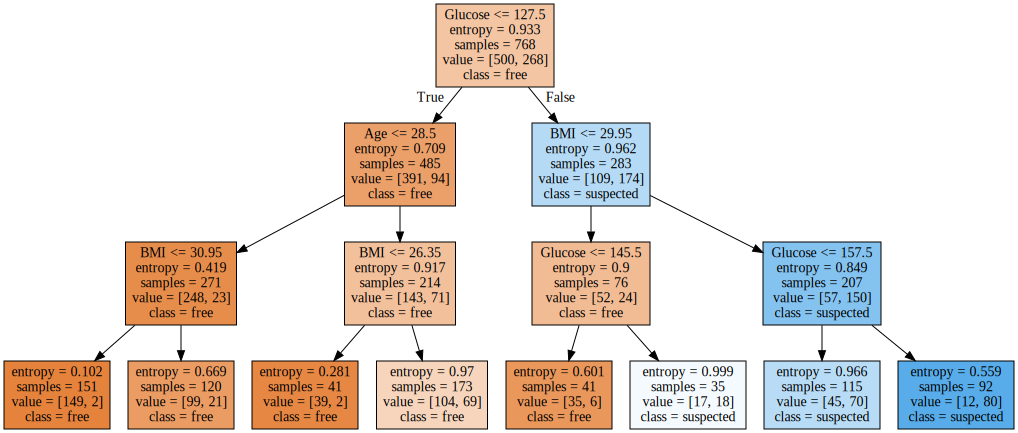

In [19]:
labels = data.columns[:8]

graph = Source(tree.export_graphviz(model_dt_grid,
                                   out_file=None,
                                   feature_names=labels,
                                   class_names=['free','suspected'],
                                   filled=True))

display(SVG(graph.pipe(format='svg')))

In [20]:
model_dt_rand.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

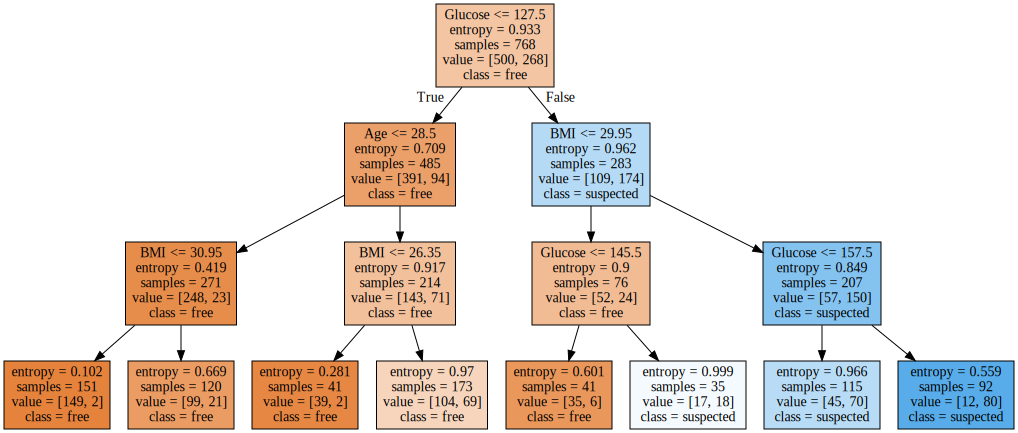

In [21]:
labels = data.columns[:8]

graph = Source(tree.export_graphviz(model_dt_rand,
                                   out_file=None,
                                   feature_names=labels,
                                   class_names=['free','suspected'],
                                   filled=True))

display(SVG(graph.pipe(format='svg')))

# 6. Grid VS Random

### Grid Search

In [24]:
fold = int(input("How many Fold do you want?"))

kf = KFold(n_splits=fold, random_state=45)
kf.get_n_splits(X)
from sklearn.metrics import accuracy_score
print(kf)

# save our score
scoring = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_dt_grid.fit(X_train,y_train)
    pred = model_dt_grid.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Decision Tree : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
print(scoring.mean())

How many Fold do you want?20
KFold(n_splits=20, random_state=45, shuffle=False)
Score in Decision Tree :  0.6666666666666666
Score in Decision Tree :  0.6410256410256411
Score in Decision Tree :  0.8461538461538461
Score in Decision Tree :  0.6923076923076923
Score in Decision Tree :  0.6666666666666666
Score in Decision Tree :  0.7435897435897436
Score in Decision Tree :  0.6666666666666666
Score in Decision Tree :  0.5897435897435898
Score in Decision Tree :  0.6842105263157895
Score in Decision Tree :  0.8157894736842105
Score in Decision Tree :  0.868421052631579
Score in Decision Tree :  0.7894736842105263
Score in Decision Tree :  0.7105263157894737
Score in Decision Tree :  0.8157894736842105
Score in Decision Tree :  0.7368421052631579
Score in Decision Tree :  0.8947368421052632
Score in Decision Tree :  0.6578947368421053
Score in Decision Tree :  0.7631578947368421
Score in Decision Tree :  0.7631578947368421
Score in Decision Tree :  0.7631578947368421
0.7387989203778679


### Random Search

In [25]:
fold = int(input("How many Fold do you want?"))

kf = KFold(n_splits=fold, random_state=45)
kf.get_n_splits(X)
from sklearn.metrics import accuracy_score
print(kf)

# save our score
scoring = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_dt_rand.fit(X_train,y_train)
    pred = model_dt_rand.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Decision Tree : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
print(scoring.mean())

How many Fold do you want?20
KFold(n_splits=20, random_state=45, shuffle=False)
Score in Decision Tree :  0.6666666666666666
Score in Decision Tree :  0.6410256410256411
Score in Decision Tree :  0.8461538461538461
Score in Decision Tree :  0.6923076923076923
Score in Decision Tree :  0.6666666666666666
Score in Decision Tree :  0.7435897435897436
Score in Decision Tree :  0.6666666666666666
Score in Decision Tree :  0.5897435897435898
Score in Decision Tree :  0.6842105263157895
Score in Decision Tree :  0.8157894736842105
Score in Decision Tree :  0.868421052631579
Score in Decision Tree :  0.7894736842105263
Score in Decision Tree :  0.7105263157894737
Score in Decision Tree :  0.8157894736842105
Score in Decision Tree :  0.7368421052631579
Score in Decision Tree :  0.8947368421052632
Score in Decision Tree :  0.6578947368421053
Score in Decision Tree :  0.7631578947368421
Score in Decision Tree :  0.7631578947368421
Score in Decision Tree :  0.7631578947368421
0.7387989203778679


Ternyata hasil rata-rata akurasinya tidak berbeda jauh bahkan hampir sama. Ini menunjukkan bahwa random search dengan komputasi yang lebih ringan mampu mendapatkan hasil yang sama dengan grid search